In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")
# Path to the Titanic dataset
file_path = r"C:\Users\VAIBHAV ADMANE\OneDrive\Desktop\Titanic-Dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first 10 rows of the dataset
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the summary statistics
df.describe()


Shape of the dataset: (891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Display the count of survived and not survived passengers
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

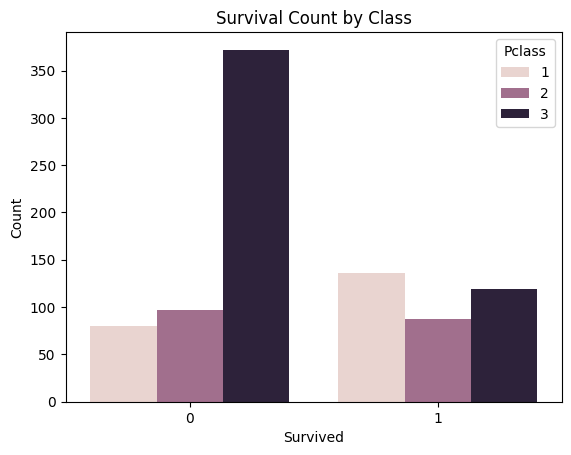

In [5]:
# Visualize the count of survived passengers by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


In [6]:
# Display the count of males and females
df["Sex"].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

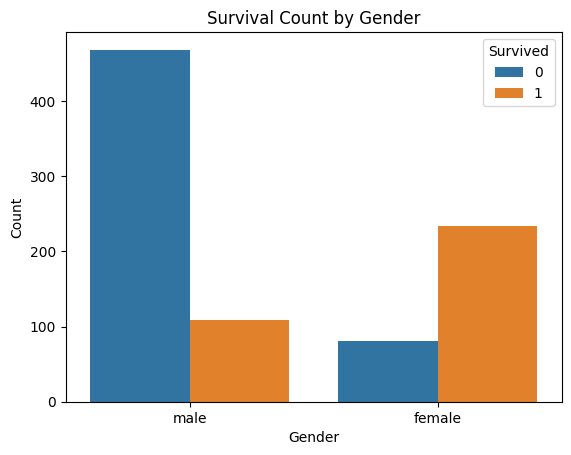

In [7]:
# Visualize the survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [8]:
# Calculate the mean survival rate by gender
df.groupby('Sex')[['Survived']].mean()


,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
# Display unique values in the 'Sex' column
df['Sex'].unique()


array(['male', 'female'], dtype=object)

In [10]:
# Encode the 'Sex' column
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

# Display the first 10 rows to confirm encoding
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


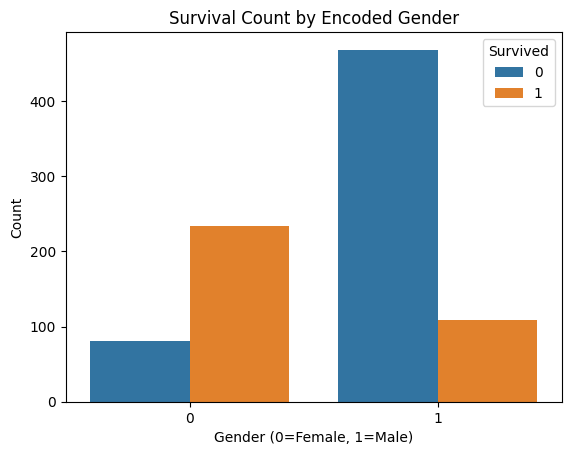

In [11]:
# Visualize the survival rate by encoded gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Encoded Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')
plt.show()


In [12]:
# Check for missing values
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Drop the 'Age' column
df = df.drop(['Age'], axis=1)

# Display the first 10 rows after dropping the 'Age' column
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,237736,30.0708,NaN,C


In [15]:
# Define the feature matrix (X) and target vector (Y)
X = df[['Pclass', 'Sex']]
Y = df['Survived']
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Train the Logistic Regression model
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
# Make predictions on the test set
pred = log.predict(X_test)

# Display predictions and actual values
print("Predictions on the test set:", pred)
print("Actual values in the test set:", Y_test.values)


Predictions on the test set: [0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
Actual values in the test set: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [18]:
# Function to make and display a prediction for user input
def make_prediction():
    try:
        pclass = int(input("Enter class (1, 2, or 3): "))
        sex = int(input("Enter gender (0 for female, 1 for male): "))
        
        if pclass not in [1, 2, 3] or sex not in [0, 1]:
            raise ValueError("Invalid input values.")
        
        res = log.predict([[pclass, sex]])
        
        # Map numerical sex value back to string for readability
        sex_str = 'Female' if sex == 0 else 'Male'
        
        # Display the prediction result
        if res == 0:
            print(f"Prediction for [Class {pclass}, {sex_str}]: Not Survived")
        else:
            print(f"Prediction for [Class {pclass}, {sex_str}]: Survived")
    
    except ValueError as ve:
        print(f"Error: {ve}. Please enter valid input values.")

# Make a prediction based on user input
make_prediction()


Enter class (1, 2, or 3):  3
Enter gender (0 for female, 1 for male):  0


Prediction for [Class 3, Female]: Survived
